In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import pickle
from jmespath import search
import time
import pandas as pd
import functools
import operator
import seaborn as sns
import altair as alt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [40]:
data_path = 'drive/My Drive/Mestrado/PROJETO/Teste 5 - final_code/data/'
model_path = 'gdrive/My Drive/Mestrado/PROJETO/Teste 5 - final_code/models/'
fig_path = 'gdrive/My Drive/Mestrado/PROJETO/Teste 5 - final_code/fig/'

In [41]:
with open(data_path + 'data_cumulantes.pkl','rb') as f:
    data = pickle.load(f)

In [42]:
data.keys()

dict_keys(['cycle_1_I_pu', 'cycle_1_I_30db', 'cycle_1_I_40db', 'cycle_1_I_50db', 'cycle_1_I_60db', 'cycle_1_I_70db', 'cycle_1_I_80db', 'cycle_1_I_90db', 'cycle_1_I_100db', 'cycle_2_I_pu', 'cycle_2_I_30db', 'cycle_2_I_40db', 'cycle_2_I_50db', 'cycle_2_I_60db', 'cycle_2_I_70db', 'cycle_2_I_80db', 'cycle_2_I_90db', 'cycle_2_I_100db', 'cycle_4_I_pu', 'cycle_4_I_30db', 'cycle_4_I_40db', 'cycle_4_I_50db', 'cycle_4_I_60db', 'cycle_4_I_70db', 'cycle_4_I_80db', 'cycle_4_I_90db', 'cycle_4_I_100db', 'cycle_8_I_pu', 'cycle_8_I_30db', 'cycle_8_I_40db', 'cycle_8_I_50db', 'cycle_8_I_60db', 'cycle_8_I_70db', 'cycle_8_I_80db', 'cycle_8_I_90db', 'cycle_8_I_100db', 'cycle_16_I_pu', 'cycle_16_I_30db', 'cycle_16_I_40db', 'cycle_16_I_50db', 'cycle_16_I_60db', 'cycle_16_I_70db', 'cycle_16_I_80db', 'cycle_16_I_90db', 'cycle_16_I_100db', 'cycle_32_I_pu', 'cycle_32_I_30db', 'cycle_32_I_40db', 'cycle_32_I_50db', 'cycle_32_I_60db', 'cycle_32_I_70db', 'cycle_32_I_80db', 'cycle_32_I_90db', 'cycle_32_I_100db'])

In [43]:
data['cycle_16_I_pu']['cum2']['A'].loc[0, 'fault_type']

'BCT'

In [ ]:
cycle_16_I_pu_cum2 = 

In [63]:
df1 = pd.DataFrame(data['cycle_16_I_pu']['cum2']['A'].iloc[0,:-1]).rename(columns={0: 'A'})
df2 = pd.DataFrame(data['cycle_16_I_pu']['cum2']['B'].iloc[0,:-1]).rename(columns={0: 'B'})
df3 = pd.DataFrame(data['cycle_16_I_pu']['cum2']['C'].iloc[0,:-1]).rename(columns={0: 'C'})
df4 = pd.DataFrame(data['cycle_16_I_pu']['cum2']['Z'].iloc[0,:-1]).rename(columns={0: 'Z'})
cycle_16_I_pu_cum2 = pd.concat([df1, df2, df3, df4], axis=1)
cycle_16_I_pu_cum2.index.rename('x', inplace=True)
cycle_16_I_pu_cum2 = cycle_16_I_pu_cum2.reset_index().melt('x', var_name='category', value_name='y')

In [64]:
cycle_16_I_pu_cum2

,x,category,y
0,0,A,0.030175
1,1,A,0.0286657
2,2,A,0.0262049
3,3,A,0.023573
4,4,A,0.0215034
...,...,...,...
315,75,Z,0.0716486
316,76,Z,0.0765555
317,77,Z,0.0832086
318,78,Z,0.0912539


In [69]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')


# The basic line
line = alt.Chart(cycle_16_I_pu_cum2).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(cycle_16_I_pu_cum2).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(cycle_16_I_pu_cum2).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)


alt.LayerChart(...)

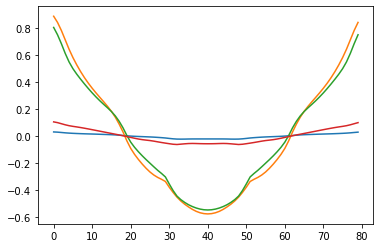

In [70]:
plt.plot(data['cycle_16_I_pu']['cum2']['A'].iloc[0,:-1]);
plt.plot(data['cycle_16_I_pu']['cum2']['B'].iloc[0,:-1]);
plt.plot(data['cycle_16_I_pu']['cum2']['C'].iloc[0,:-1]);
plt.plot(data['cycle_16_I_pu']['cum2']['Z'].iloc[0,:-1]);

In [46]:
a

In [ ]:
len(data)

940

## PASSO 2: Cálculo dos cumulantes dos sinais

Funções para cálculo dos cumulantes:



In [ ]:
# OBS: Somente as três últimas funções são utilizadas, as primeiras são apenas
# funções auxiliares.

def cum2Calc(vetMediaZero, nPoints, ii):
	return np.matmul(vetMediaZero.T, np.roll(vetMediaZero, ii))/nPoints

def cum3Calc(vetMediaZero, nPoints, ii):
	return np.matmul(vetMediaZero.T, np.roll(vetMediaZero, ii)**2)/nPoints

def cum4Calc(vetMediaZero, nPoints, ii):
	sumOfSquares = np.dot(vetMediaZero.T, vetMediaZero)
	part1 = np.matmul(vetMediaZero.T, np.roll(vetMediaZero, ii)**3)/nPoints
	part2 = 3*np.matmul(vetMediaZero.T, np.roll(vetMediaZero, ii))*sumOfSquares/(nPoints**2)
	cum4 = part1 - part2
	return cum4

def cumCalc(vetEntrada, nEvents, order):

	if (order == 2): 
		functionCalled = cum2Calc
	elif (order == 3):
		functionCalled = cum3Calc
	elif (order==4):
		functionCalled = cum4Calc
	else:
		return

	# Transformando vetEntrada em um vetor coluna:
	dimVet = vetEntrada.shape
	if(dimVet[0]==nEvents):   
		vetEntrada = vetEntrada.T

	nPoints = vetEntrada[:,0].size  # number of points per column
	
	# Pre - allocating space
	cum = np.zeros([nEvents, nPoints])

	for i in range(nEvents):
		# Transformando vetEntrada em um vetor de média nula:
		media = np.mean(vetEntrada[:,i])
		vetMediaZero = vetEntrada[:,i] - media

		for ii in range(nPoints):
			cum[i,ii] = functionCalled(vetMediaZero, nPoints, ii)

	return cum

def cum2(vetEntrada, nEvents):
	return cumCalc(vetEntrada, nEvents, 2)

def cum3(vetEntrada, nEvents):
	return cumCalc(vetEntrada, nEvents, 3)

def cum4(vetEntrada, nEvents):
	return cumCalc(vetEntrada, nEvents, 4)
 
def drange(start, stop, step):
    while start < stop:
            yield start
            start *= step

In [ ]:
data[0].keys()

dict_keys(['fault_type', 'cycle_1', 'cycle_2', 'cycle_4', 'cycle_8', 'cycle_16', 'cycle_32', 'fault_type_bin'])

In [ ]:
data[0]['cycle_1'].keys()

dict_keys(['I_pu', 'I_30db', 'I_40db', 'I_50db', 'I_60db', 'I_70db', 'I_80db', 'I_90db', 'I_100db'])

In [ ]:
data[0]['fault_type']

'BCT'

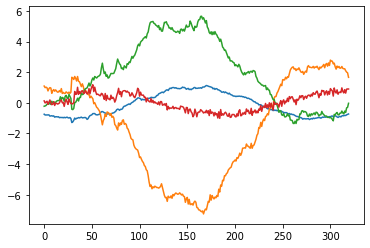

In [ ]:
plt.plot(data[0]['cycle_1']['I_30db']);

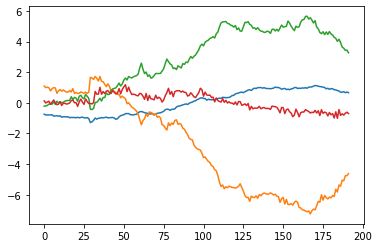

In [ ]:
plt.plot(data[0]['cycle_2']['I_30db']);

In [ ]:
data[0].keys()

dict_keys(['fault_type', 'cycle_1', 'cycle_2', 'cycle_4', 'cycle_8', 'cycle_16', 'cycle_32', 'fault_type_bin'])

In [ ]:
data[0]['cycle_1'].keys()

dict_keys(['I_pu', 'I_30db', 'I_40db', 'I_50db', 'I_60db', 'I_70db', 'I_80db', 'I_90db', 'I_100db'])

In [ ]:
key_list = []
for key in data[0].keys():
    if 'cycle' in key:
        key_list.append([key + '.' + k for k in data[0]['cycle_1'].keys()])

In [ ]:
types = search("[*].fault_type", data)
types = pd.Series(types, name='fault_type')

In [ ]:
key_list = functools.reduce(operator.iconcat, key_list, [])

In [ ]:
key_list[1]

'cycle_1.I_30db'

In [ ]:
types

0      BCT
1      CAT
2       CA
3      ABC
4       CT
      ... 
935    CAT
936     AT
937    BCT
938     BT
939    ABT
Name: fault_type, Length: 940, dtype: object

In [ ]:
timeStart = time.perf_counter()
types = search("[*].fault_type", data)
cum_data_dict = {}
for key in key_list:
    src = f"[*].{key}"
    signal = search(src, data)

    signal_a_list = []
    signal_b_list = []
    signal_c_list = []
    signal_z_list = []
    for i in range(len(signal)):
        signal_a_list.append(signal[i][:,0].reshape(1,-1))
        signal_b_list.append(signal[i][:,1].reshape(1,-1))
        signal_c_list.append(signal[i][:,2].reshape(1,-1))
        signal_z_list.append(signal[i][:,3].reshape(1,-1))

    signal_a = np.row_stack(signal_a_list)
    signal_b = np.row_stack(signal_b_list)
    signal_c = np.row_stack(signal_c_list)
    signal_z = np.row_stack(signal_z_list)

    fundCum2a = cum2(signal_a, 940);
    fundCum3a = cum3(signal_a, 940);
    fundCum4a = cum4(signal_a, 940);

    fundCum2b = cum2(signal_b, 940);
    fundCum3b = cum3(signal_b, 940);
    fundCum4b = cum4(signal_b, 940);

    fundCum2c = cum2(signal_c, 940);
    fundCum3c = cum3(signal_c, 940);
    fundCum4c = cum4(signal_c, 940);

    fundCum2z = cum2(signal_z, 940);
    fundCum3z = cum3(signal_z, 940);
    fundCum4z = cum4(signal_z, 940);

    new_key = '_'.join(src.split('.')[1:]) 
    cum_dict = {new_key: {'cum2': {'A': pd.concat([pd.DataFrame(fundCum2a), pd.Series(types, name='fault_type')], axis=1),
                                   'B': pd.concat([pd.DataFrame(fundCum2b), pd.Series(types, name='fault_type')], axis=1),
                                   'C': pd.concat([pd.DataFrame(fundCum2c), pd.Series(types, name='fault_type')], axis=1),
                                   'Z': pd.concat([pd.DataFrame(fundCum2z), pd.Series(types, name='fault_type')], axis=1),},
                          'cum3': {'A': pd.concat([pd.DataFrame(fundCum3a), pd.Series(types, name='fault_type')], axis=1),
                                   'B': pd.concat([pd.DataFrame(fundCum3b), pd.Series(types, name='fault_type')], axis=1),
                                   'C': pd.concat([pd.DataFrame(fundCum3c), pd.Series(types, name='fault_type')], axis=1),
                                   'Z': pd.concat([pd.DataFrame(fundCum3z), pd.Series(types, name='fault_type')], axis=1),},
                          'cum4': {'A': pd.concat([pd.DataFrame(fundCum4a), pd.Series(types, name='fault_type')], axis=1),
                                   'B': pd.concat([pd.DataFrame(fundCum4b), pd.Series(types, name='fault_type')], axis=1),
                                   'C': pd.concat([pd.DataFrame(fundCum4c), pd.Series(types, name='fault_type')], axis=1),
                                   'Z': pd.concat([pd.DataFrame(fundCum4z), pd.Series(types, name='fault_type')], axis=1),},
                          } 
                }
    cum_data_dict.update(cum_dict)
timeElapsed = time.perf_counter() - timeStart

In [ ]:
timeElapsed

3179.176108953

In [ ]:
cum_data_dict.keys()

dict_keys(['cycle_1_I_pu', 'cycle_1_I_30db', 'cycle_1_I_40db', 'cycle_1_I_50db', 'cycle_1_I_60db', 'cycle_1_I_70db', 'cycle_1_I_80db', 'cycle_1_I_90db', 'cycle_1_I_100db', 'cycle_2_I_pu', 'cycle_2_I_30db', 'cycle_2_I_40db', 'cycle_2_I_50db', 'cycle_2_I_60db', 'cycle_2_I_70db', 'cycle_2_I_80db', 'cycle_2_I_90db', 'cycle_2_I_100db', 'cycle_4_I_pu', 'cycle_4_I_30db', 'cycle_4_I_40db', 'cycle_4_I_50db', 'cycle_4_I_60db', 'cycle_4_I_70db', 'cycle_4_I_80db', 'cycle_4_I_90db', 'cycle_4_I_100db', 'cycle_8_I_pu', 'cycle_8_I_30db', 'cycle_8_I_40db', 'cycle_8_I_50db', 'cycle_8_I_60db', 'cycle_8_I_70db', 'cycle_8_I_80db', 'cycle_8_I_90db', 'cycle_8_I_100db', 'cycle_16_I_pu', 'cycle_16_I_30db', 'cycle_16_I_40db', 'cycle_16_I_50db', 'cycle_16_I_60db', 'cycle_16_I_70db', 'cycle_16_I_80db', 'cycle_16_I_90db', 'cycle_16_I_100db', 'cycle_32_I_pu', 'cycle_32_I_30db', 'cycle_32_I_40db', 'cycle_32_I_50db', 'cycle_32_I_60db', 'cycle_32_I_70db', 'cycle_32_I_80db', 'cycle_32_I_90db', 'cycle_32_I_100db'])

In [ ]:
len(cum_data_dict.keys())

54

In [ ]:
cum_data_dict['cycle_1_I_30db']['cum2']['A']['fault_type'][0]

'BCT'

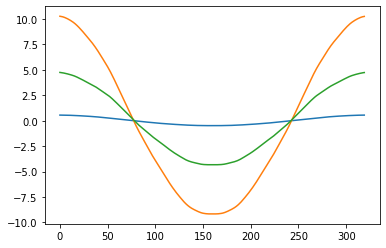

In [ ]:
plt.plot(cum_data_dict['cycle_1_I_30db']['cum2']['A'].iloc[0,:-1]);
plt.plot(cum_data_dict['cycle_1_I_30db']['cum2']['B'].iloc[0,:-1]);
plt.plot(cum_data_dict['cycle_1_I_30db']['cum2']['C'].iloc[0,:-1]);

In [ ]:
cum_data_dict['cycle_1_I_30db']['cum2']['A']['fault_type'][1]

'CAT'

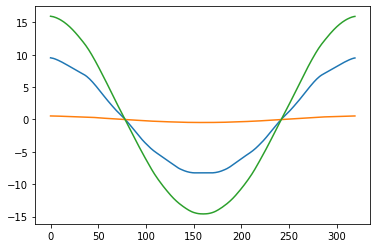

In [ ]:
plt.plot(cum_data_dict['cycle_1_I_30db']['cum2']['A'].iloc[1,:-1]);
plt.plot(cum_data_dict['cycle_1_I_30db']['cum2']['B'].iloc[1,:-1]);
plt.plot(cum_data_dict['cycle_1_I_30db']['cum2']['C'].iloc[1,:-1]);

In [ ]:
with open(data_path + 'data_cumulantes.pkl','wb') as f:
    data = pickle.dump(cum_data_dict, f)

In [ ]:
with open(data_path + 'data_cumulantes.pkl','rb') as f:
    teste = pickle.load(f)

In [ ]:
teste.keys()

dict_keys(['cycle_1_I_pu', 'cycle_1_I_30db', 'cycle_1_I_40db', 'cycle_1_I_50db', 'cycle_1_I_60db', 'cycle_1_I_70db', 'cycle_1_I_80db', 'cycle_1_I_90db', 'cycle_1_I_100db', 'cycle_2_I_pu', 'cycle_2_I_30db', 'cycle_2_I_40db', 'cycle_2_I_50db', 'cycle_2_I_60db', 'cycle_2_I_70db', 'cycle_2_I_80db', 'cycle_2_I_90db', 'cycle_2_I_100db', 'cycle_4_I_pu', 'cycle_4_I_30db', 'cycle_4_I_40db', 'cycle_4_I_50db', 'cycle_4_I_60db', 'cycle_4_I_70db', 'cycle_4_I_80db', 'cycle_4_I_90db', 'cycle_4_I_100db', 'cycle_8_I_pu', 'cycle_8_I_30db', 'cycle_8_I_40db', 'cycle_8_I_50db', 'cycle_8_I_60db', 'cycle_8_I_70db', 'cycle_8_I_80db', 'cycle_8_I_90db', 'cycle_8_I_100db', 'cycle_16_I_pu', 'cycle_16_I_30db', 'cycle_16_I_40db', 'cycle_16_I_50db', 'cycle_16_I_60db', 'cycle_16_I_70db', 'cycle_16_I_80db', 'cycle_16_I_90db', 'cycle_16_I_100db', 'cycle_32_I_pu', 'cycle_32_I_30db', 'cycle_32_I_40db', 'cycle_32_I_50db', 'cycle_32_I_60db', 'cycle_32_I_70db', 'cycle_32_I_80db', 'cycle_32_I_90db', 'cycle_32_I_100db'])